# HW9 _ xy1002
# Goal: Find outliers, trends and periodicity in the MTA turnstile data
    


# Task 1:
### Event detection: Identify the most prominent event. There is a very significant drop (>3-sigma) in all time series.
### Identify it, figure out the date (you know when the data starts and what the cadence is) and figure out what it is due to.

In [1]:
import numpy as np
import pandas as pd
import pylab as pl

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
mtaRides = np.load("MTA_Fare.npy")

In [125]:
print('First I wanna know the shape of the data set: {}'.format(mtaRides.shape))


First I wanna know the shape of the data set: (600, 23, 194)


In [5]:
#Changing the (-1) value in dataset into nan.
mtaRides = mtaRides.astype('float')
mtaRides[mtaRides == (-1)] = 'nan'

In [126]:
#Divided the dataset by summing up different stations.
mta_cardsum = np.nansum(mtaRides, axis=0)
print('The shape for ridetypes: {}'.format(mta_cardsum.shape))

The shape for ridetypes: (23, 194)


In [127]:
#Divided the dataset by summing up different ridetype.
mta_stationsum = np.nansum(mtaRides, axis=1)
print('The shape for satations: {}'.format(mta_stationsum.shape))

The shape for satations: (600, 194)


In [128]:
#add an array that contains the correct date range and match with the 
#dimention of the time series.
date = pd.date_range(start = '05/25/2010', end = '02/15/2014', freq = 'w')


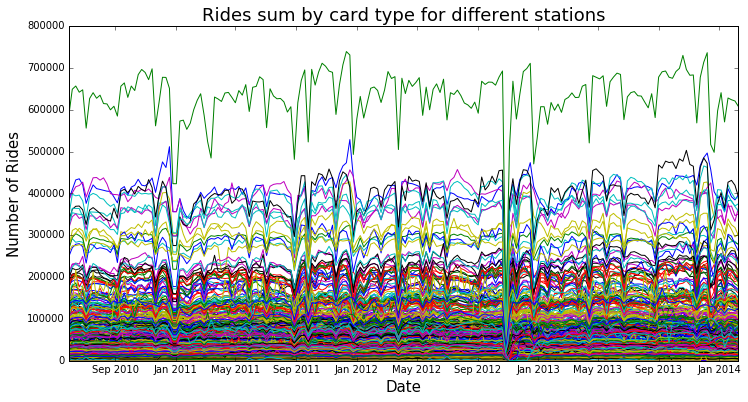

In [132]:
#Plot the number of rides for different stations.

pl.figure(figsize = (12, 6))
for i in range (0, mta_stationsum.shape[0]):
    pl.plot(date, mta_stationsum[i])
    
pl.title("Rides sum by card type for different stations", fontsize = 18)
pl.xlabel("Date", fontsize = 15)
pl.ylabel("Number of Rides", fontsize = 15)



### Figure 1: Rides number for different stations.

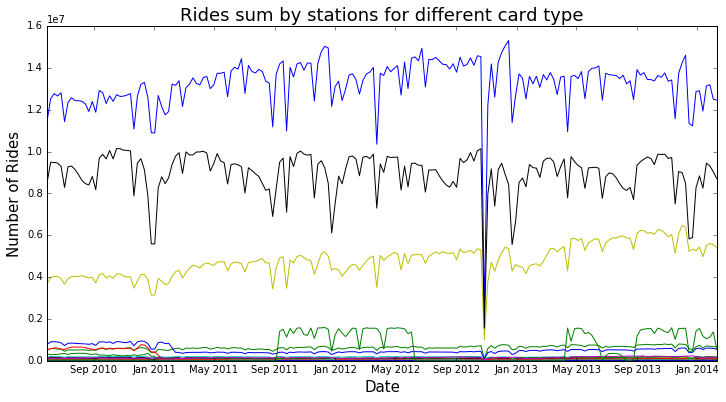

In [133]:
#Plot the number of rides for different card types.
pl.figure(figsize = (12, 6))
for i in range (0, mta_cardsum.shape[0]):
    pl.plot(date, mta_cardsum[i])
pl.title("Rides sum by stations for different card type", fontsize = 18)
pl.xlabel("Date", fontsize = 15)
pl.ylabel("Number of Rides", fontsize = 15)


### Figure 2: RIdes number for different ride types.

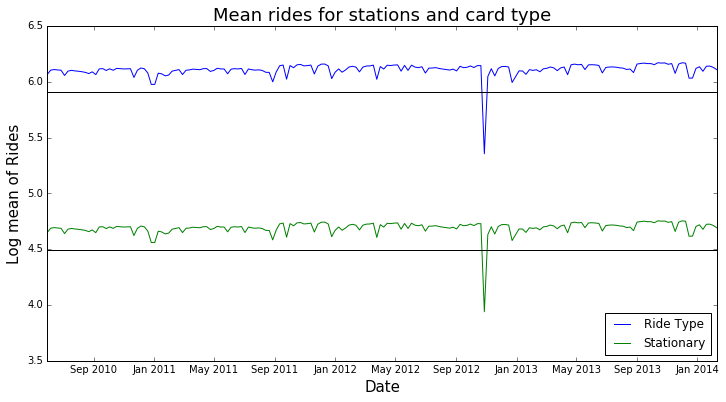

In [134]:
#Now Im trying to plot the figure of mean rider for card type and stationary
pl.figure(figsize = (12, 6))
typemean = []
for i in range (0, mta_cardsum.shape[1]):
    typemean.append(mta_cardsum[:,i].mean())
typemean = np.array(typemean)
pl.plot(date, np.log10(typemean), label = 'Ride Type')

stationmean = []
for i in range (0, mta_stationsum.shape[1]):
    stationmean.append(mta_stationsum[:,i].mean())
stationmean = np.array(stationmean)
pl.plot(date, np.log10(stationmean), label = 'Stationary')

pl.legend(loc = 'lower right')

thresholds_t = [np.log10(typemean).mean() + 3 * np.log10(typemean).std(), 
                np.log10(typemean).mean() - 3 * np.log10(typemean).std()]
thresholds_s = [np.log10(stationmean).mean() + 3 * np.log10(stationmean).std(), 
                np.log10(stationmean).mean() - 3 * np.log10(stationmean).std()]

#ploting threshold for two mean swipe number.
pl.plot([pl.xlim()[0], pl.xlim()[1]], [thresholds_t[1], thresholds_t[1]], color="Black", lw=1)#pl.plot([pl.xlim()[0], pl.xlim()[1]], [thresholds_s[0], thresholds_s[0]], color="Black", lw=1)
pl.plot([pl.xlim()[0], pl.xlim()[1]], [thresholds_s[1], thresholds_s[1]], color="Black", lw=1)

pl.title("Mean rides for stations and card type", fontsize = 18)
pl.xlabel("Date", fontsize = 15)
pl.ylabel("Log mean of Rides", fontsize = 15)

### Figure 3: Mean log Rides among all stations and all rideship. 

In [136]:
#identify when the even happened
t = date[np.where(np.log10(typemean) < thresholds_t[1])]
s = date[np.where(np.log10(stationmean) < thresholds_s[1])]

print("From those 3 figures we can see that there is a drametic drop happened" \
     + " on {}, from the news we know that this event is due to the".format(t.date[0]) \
     + " effects of Hurricane Sandy in New York.")
print("Reference: https://en.wikipedia.org/wiki/Effects_of_Hurricane_Sandy"
      +"_in_New_York")


From those 3 figures we can see that there is a drametic drop happened on 2012-10-28, from the news we know that this event is due to the effects of Hurricane Sandy in New York.
Reference: https://en.wikipedia.org/wiki/Effects_of_Hurricane_Sandy_in_New_York


# Task 2:
### Identify the ridership types that have steadily increased in popularity, and that have steadily decreased. by how much? (e.g what is the ratio of usage in the first 10 and last 10 weeks)


In [13]:

ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

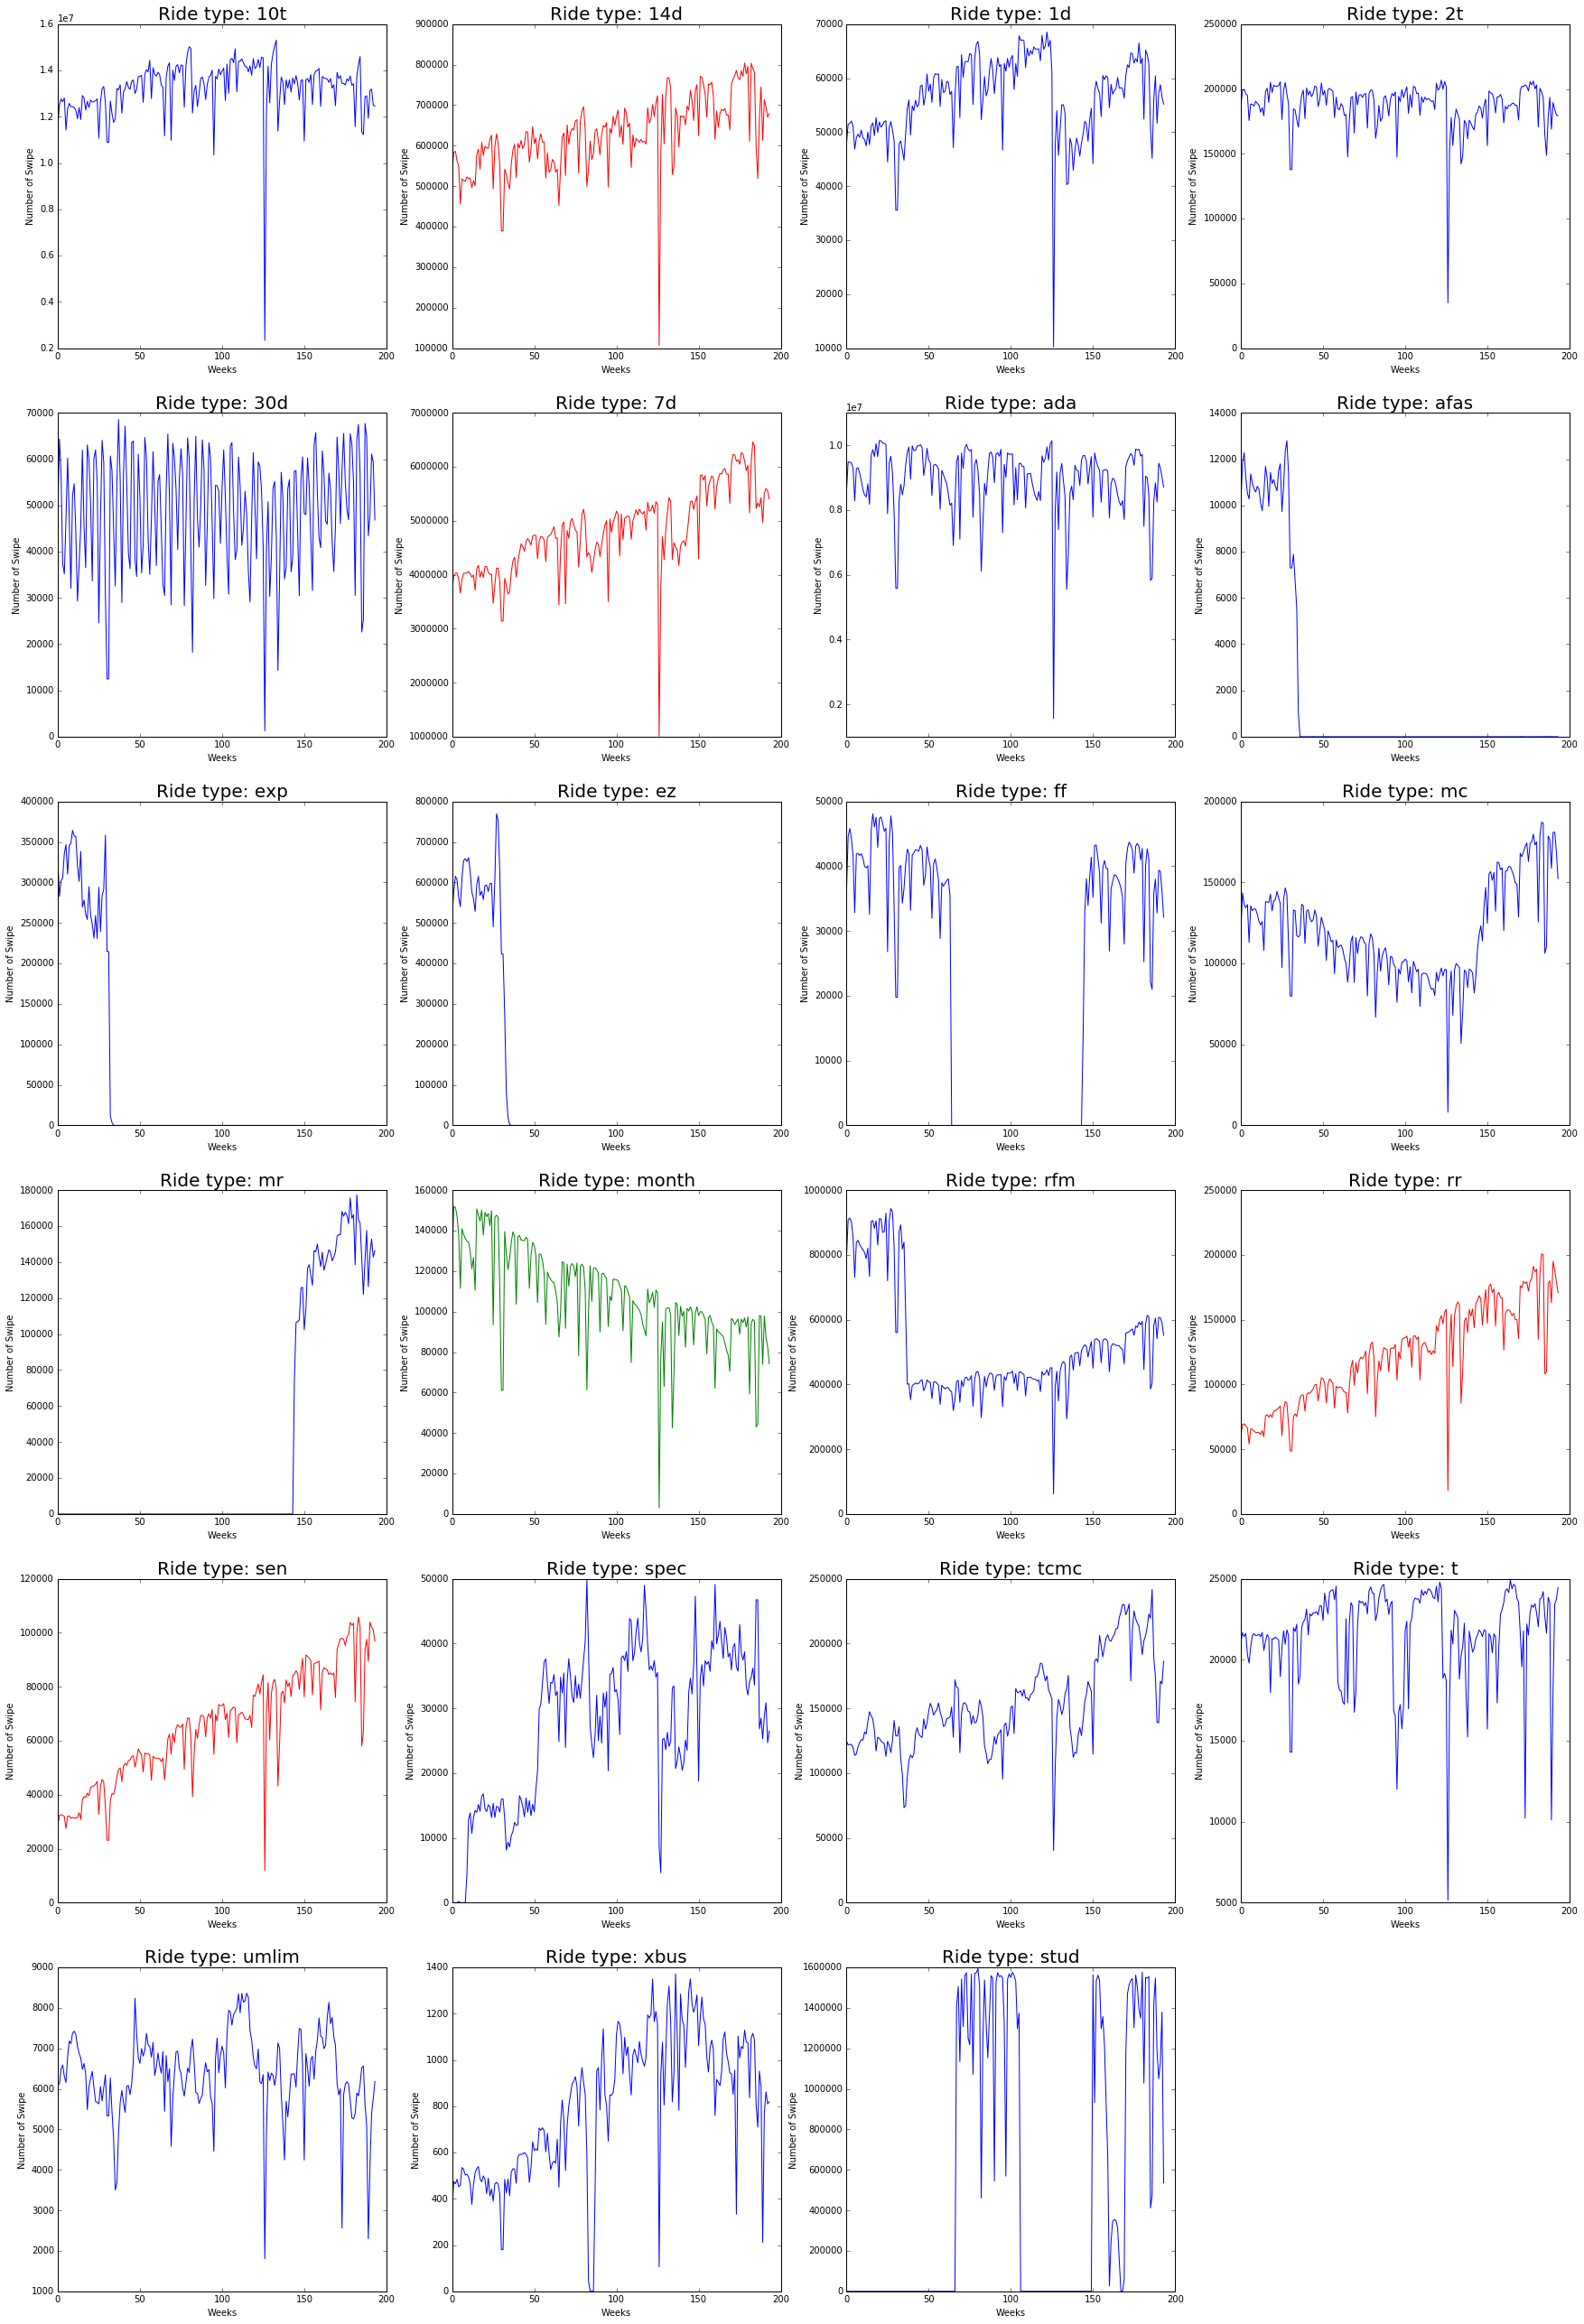

In [137]:
#plotting all 23 card types' trend
fig = pl.figure(figsize=(30,45))
ax = [0]*24


for i in range (0, mta_cardsum.shape[0]):
    #print(i)
    ax[i] = fig.add_subplot(6,4,i+1)
    if (i == 1 or i == 5 or i == 15 or i == 16):
        ax[i].plot(mta_cardsum[i], color = 'r')
    elif (i == 13):
        ax[i].plot(mta_cardsum[i], color = 'g')
    else:
        ax[i].plot(mta_cardsum[i])
    ax[i].set_title("Ride type: {}".format(ridetype[i]), fontsize = 20)
    ax[i].set_xlabel("Weeks")
    ax[i].set_ylabel("Number of Swipe")


### Figure 4: Trends of 23 card type. From which has a steadily decreasing trend shows in green, and which has a steadily increasing trend shows in red. 

From the figure above we can conclude that: 
14d has a steadily increasing trend and increased by 1.19.

7d has a steadily increasing trend and increased by 1.23.

rr has a steadily increasing trend and increased by 1.94.

sen has a steadily increasing trend and increased by 2.15.



C:\Users\xy1002\WinPython-64bit-3.5.2.2\python-3.5.2.amd64\lib\site-packages\ipykernel\__main__.py:16: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version


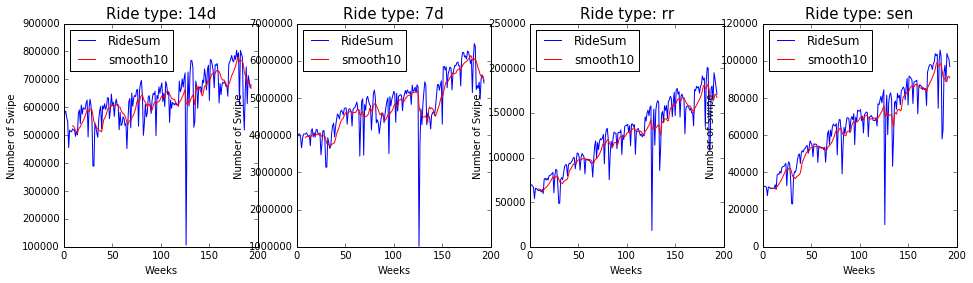

In [99]:
#Increasing trends are 2,6,16,17, and decreasing trend is 14
#Calculating the increasing ratio and plot them
increase = [2,6,16,17]
fig = pl.figure(figsize=(16,4))
ax = [0]*4

print ("From the figure above we can conclude that: ")
for i in range(0, len(increase)):
    #ratio_i.append(
    index = increase[i] - 1
    ratio = (mta_cardsum[index][10:].mean()) / (mta_cardsum[index][:10].mean())
    print("{}".format(ridetype[index]) \
        + " has a steadily increasing trend and increased by %.2f." % ratio)
    print()
    ax[i] = fig.add_subplot(1,4,i+1)
    ax[i].plot(mta_cardsum[index], label = 'RideSum')
    ax[i].plot(pd.rolling_mean(mta_cardsum[index], 10), color = "r", \
              label = 'smooth10') 
    ax[i].set_title("Ride type: {}".format(ridetype[index]), fontsize = 15)
    ax[i].set_xlabel("Weeks")
    ax[i].set_ylabel("Number of Swipe")
    ax[i].legend(loc = 'upper left')


#### Figure 5: Increasing trends: 14 day's trip has a steadily increasing trend and increased by 1.19; 7 day's trip has a steadily increasing trend and increased by 1.23; Rail Road's trip has a steadily increasing trend and increased by 1.94; Senior Citizen/Disabled's trip has a steadily increasing trend and increased by 2.15.

From the figure above we can conclude that: 
month has a steadily increasing trend and increased by 0.77



C:\Users\xy1002\WinPython-64bit-3.5.2.2\python-3.5.2.amd64\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version


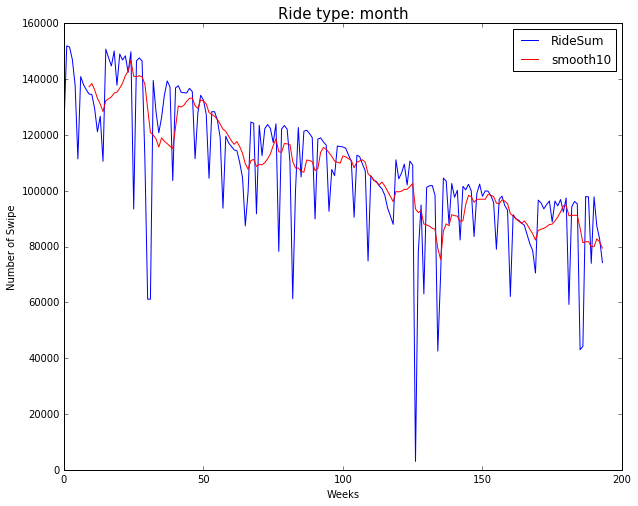

In [16]:
#Calculating the idecreasing ratio and plot it
decrease = 14
pl.figure(figsize=(10,8))
print ("From the figure above we can conclude that: ")
index_d = decrease - 1
ratio_d = (mta_cardsum[index_d][10:].mean()) / (mta_cardsum[index_d][:10].mean())
print("{}".format(ridetype[index_d]) \
        + " has a steadily increasing trend and increased by %.2f" % ratio_d)
print()
pl.plot(mta_cardsum[index_d], label = 'RideSum')
pl.plot(pd.rolling_mean(mta_cardsum[index_d], 10), color = "r", \
              label = 'smooth10') 
pl.title("Ride type: {}".format(ridetype[index_d]), fontsize = 15)
pl.xlabel("Weeks")
pl.ylabel("Number of Swipe")
pl.legend(loc = 'upper right')

#### Figure 6: Decreasing trend: Monthly trips has a steadily increasing trend and increased by 0.77

# Task 3:
### Several stations show a prominent annual periodicity. Identify the 4 stations (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)

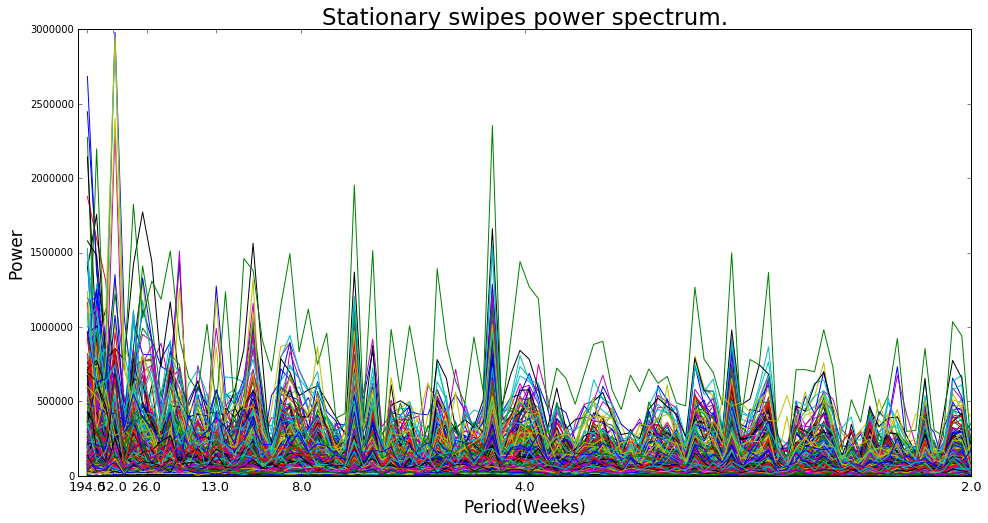

In [113]:
# Plotting the power spectrum
fig = pl.figure(figsize=(16,8))
ax = [0]
N = len(mta_stationsum[0])

for i in range (0, mta_stationsum.shape[0]):
    #print(i)
    ax = fig.add_subplot(111)
    f = np.abs(np.fft.rfft(mta_stationsum[i]))[1:]
    fre = np.fft.rfftfreq(N, 1.0)[1:]
    ax.plot(fre, f, '-')
    
allperiods = [1/194.0, 1/52.0, 1/26.0, 1/13.0, 1/8.0, 1/4.0 ,1/2.0]
ax.set_xticks(allperiods)
ax.set_xticklabels([ "%s" % (1/f) for f in allperiods], fontsize = 13)
ax.set_title("Stationary swipes power spectrum.", fontsize = 23)
ax.set_xlabel("Period(Weeks)", fontsize = 17)
ax.set_ylabel("Power", fontsize = 17)


#### Figure 7: Stationary swipes power spectrum.

In [71]:

power = []
for i in range (0, mta_stationsum.shape[0]):
    
    f = np.abs(np.fft.rfft(mta_stationsum[i]))[1:]
    fre = np.fft.rfftfreq(N, 1.0)[1:]
    power.append(f[fre == 1/48.5])


In [93]:
power = np.array(power)
power = power.flatten()
power.shape

(600,)

In [101]:
max_i = np.argpartition(power, -4)[-4:]
max_i 

array([327, 150, 194,   0], dtype=int64)

Here are the stations that show a prominent annul periodicity: 


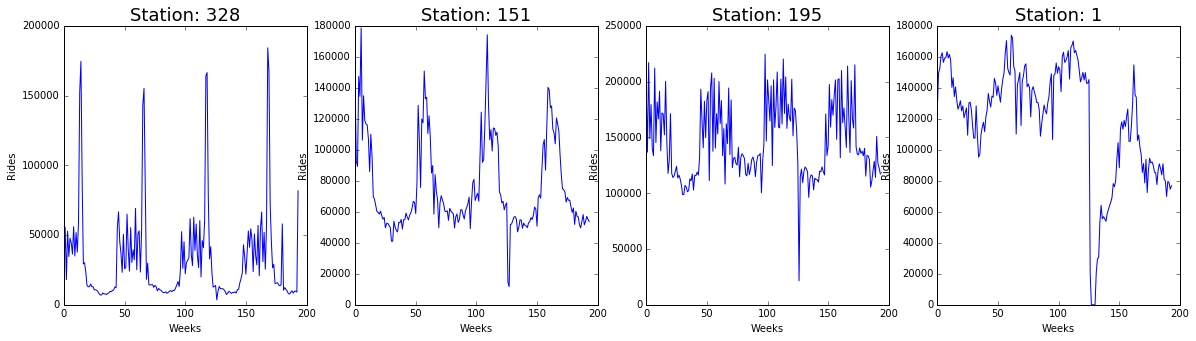

In [107]:
#I identified the index for the 4 stations that have the maximum power,
#now I will plot all of them 
fig = pl.figure(figsize=(20,5))
ax = [0]*4

print ("Here are the stations that show a prominent annul periodicity: ")
for i in range(0, len(max_i)):
    index = max_i[i]
    #print("{}".format(ridetype[index]) \
    #    + " has a steadily increasing trend and increased by %.2f." % ratio)
    #print()
    ax[i] = fig.add_subplot(1,4,i+1)
    ax[i].plot(mta_stationsum[index])
    ax[i].set_title("Station: {}".format(index+1), fontsize = 18)
    ax[i].set_xlabel("Weeks")
    ax[i].set_ylabel("Rides")
    

#### Figure 8: 4 stations that have a prominent annul periodicity.